In [154]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.axes as axes
from matplotlib.patches import Ellipse
import seaborn as sns
import scipy.stats as stats
import matplotlib.lines as mlines

import numpy as np
from numpy.linalg import LinAlgError

import time
from mpl_toolkits.mplot3d import Axes3D

In [19]:
def normalize(v):
    mini = np.min(v)
    ran = np.max(v) - mini
    v2 = (v - mini)/ran
    
    return v2

# Toy Model

We assume a class of 50 students. The course has 5 units consisting of videos and assignments.

In [108]:
stud_id = np.arange(50)
ex1 = normalize(stats.skewnorm.rvs(a=-4,loc=0,size=50))
ex2 = normalize(stats.skewnorm.rvs(a=-2,loc=0,size=50))
ex3 = normalize(stats.skewnorm.rvs(a=-6,loc=0,size=50))
ex4 = normalize(stats.skewnorm.rvs(a=-1,loc=0,size=50))
ex5 = normalize(stats.skewnorm.rvs(a=4,loc=0,size=50))

vid1 = normalize(stats.norm.rvs(loc=0,size=50))
vid2 = normalize(stats.norm.rvs(loc=0,size=50))
vid3 = normalize(stats.norm.rvs(loc=0,size=50))
vid4 = normalize(stats.norm.rvs(loc=0,size=50))
vid5 = normalize(stats.norm.rvs(loc=0,size=50))

In [109]:
ex = np.array([ex1,ex2,ex3,ex4,ex5])
vid = np.array([vid1,vid2,vid3,vid4,vid5])

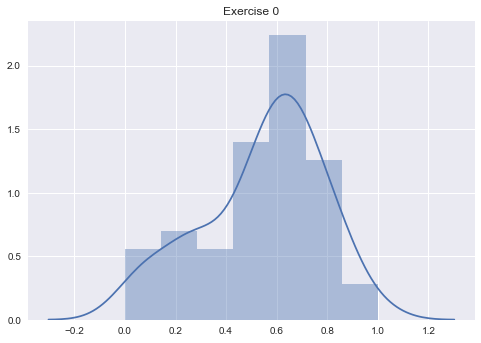

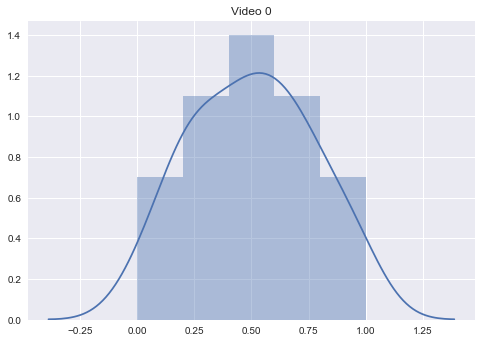

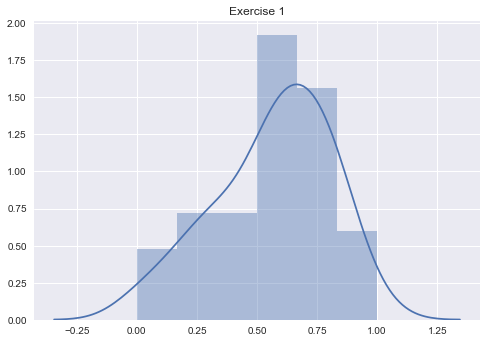

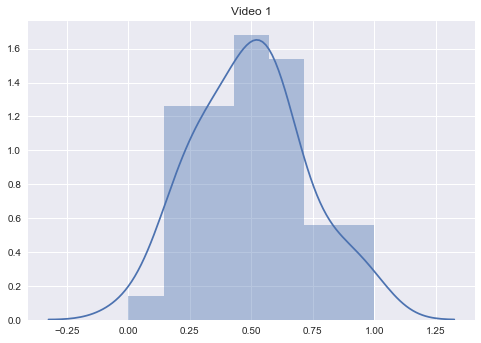

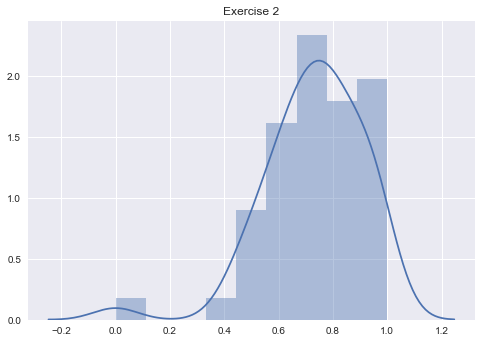

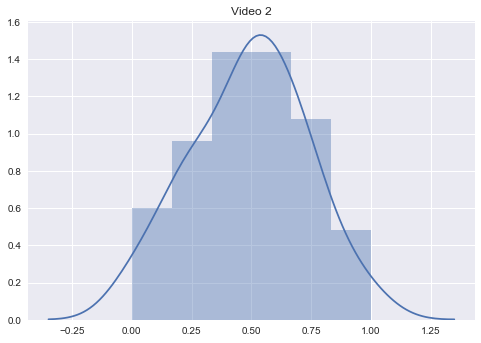

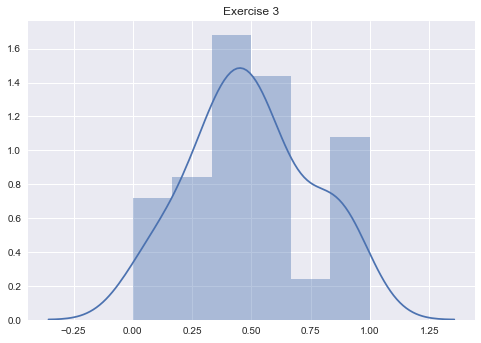

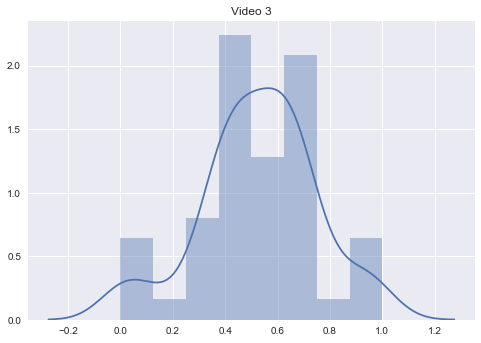

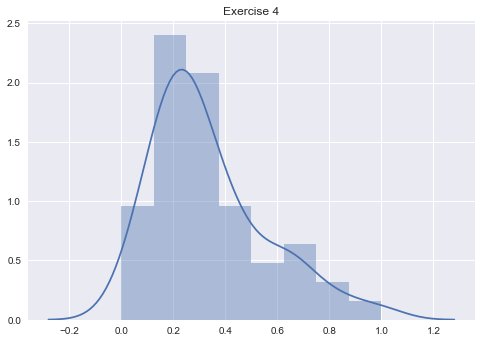

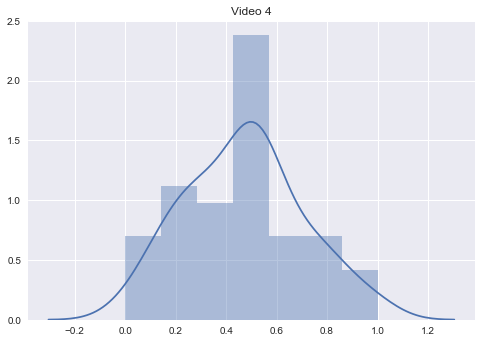

In [110]:
for i in np.arange(5):
    sns.distplot(ex[i])
    plt.title("Exercise "+str(i))
    plt.show()
    sns.distplot(vid[i])
    plt.title("Video "+str(i))
    plt.show()

In [117]:
def classify(ex_vector, vid_vector):
    ind = np.arange(50)
    
    ex_mean = np.mean(ex_vector)
    ex_std = np.std(ex_vector)
    #print(ex_mean)
    #print(ex_std)
    vid_mean = np.mean(vid_vector)
    vid_std = np.std(vid_vector)
    #print(vid_std)
    grades = np.zeros(50)
    
    r1 = ind[np.logical_and(vid_vector>vid_mean, ex_vector>ex_mean)]
    r2 = ind[np.logical_and(vid_vector<=vid_mean, ex_vector>ex_mean - ex_std,ex_vector <= ex_mean + ex_std )]
    o = ind[np.logical_and(vid_vector<vid_mean, ex_vector>= ex_mean+ex_std)]
    u = ind[np.logical_and(vid_vector>vid_mean, ex_vector<ex_mean)]
    d = ind[np.logical_and(vid_vector<vid_mean, ex_vector<ex_mean-ex_std)]
    
    
    
    grades[r1] = 2
    grades[r2] = 2
    grades[u] = 1
    grades[d] = 0
    grades[o] = 3
    return grades
     
    
    
    
    
    

In [118]:
students_grade = np.zeros((50,5))

for i in np.arange(5):
    students_grade[:,i] = classify(ex[i],vid[i])

print(students_grade)



[[ 2.  3.  1.  2.  3.]
 [ 2.  0.  2.  1.  2.]
 [ 1.  2.  2.  2.  2.]
 [ 2.  2.  2.  1.  2.]
 [ 2.  2.  2.  1.  1.]
 [ 2.  0.  3.  1.  2.]
 [ 2.  0.  1.  2.  2.]
 [ 2.  3.  2.  3.  2.]
 [ 2.  2.  2.  2.  2.]
 [ 1.  2.  3.  2.  1.]
 [ 0.  2.  1.  2.  1.]
 [ 2.  2.  1.  1.  2.]
 [ 3.  2.  2.  2.  0.]
 [ 2.  2.  0.  1.  3.]
 [ 2.  1.  2.  2.  1.]
 [ 1.  2.  2.  2.  2.]
 [ 2.  2.  2.  3.  3.]
 [ 0.  1.  1.  2.  2.]
 [ 2.  2.  2.  2.  1.]
 [ 2.  2.  2.  3.  1.]
 [ 2.  1.  1.  2.  1.]
 [ 2.  2.  2.  2.  2.]
 [ 2.  2.  2.  1.  1.]
 [ 1.  1.  1.  2.  2.]
 [ 0.  2.  2.  3.  2.]
 [ 0.  2.  2.  2.  2.]
 [ 1.  2.  2.  2.  1.]
 [ 2.  3.  1.  1.  0.]
 [ 0.  2.  2.  0.  2.]
 [ 2.  2.  0.  1.  2.]
 [ 1.  1.  2.  2.  3.]
 [ 2.  3.  1.  2.  1.]
 [ 2.  2.  2.  1.  2.]
 [ 2.  2.  1.  2.  2.]
 [ 2.  2.  2.  3.  3.]
 [ 3.  2.  2.  1.  1.]
 [ 2.  0.  2.  1.  1.]
 [ 1.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.]
 [ 2.  2.  2.  1.  2.]
 [ 0.  2.  0.  1.  1.]
 [ 2.  2.  1.  2.  2.]
 [ 1.  1.  2.  3.  1.]
 [ 2.  2.  

In [164]:
unit_results = np.transpose(students_grade)
unit = unit_results[0]
unit_counts = np.zeros((5,4))
#for i in np.arange[5]:
for j in np.arange(5):
    unit = unit_results[j]
    for i in np.arange(4):
        unit_counts[j,i] = np.size(unit[unit==i])
print(unit_counts)

uc = np.transpose(unit_counts)
print(uc)

uc[2,2] -= 20
uc[1,2] +=20

[[  6.  11.  30.   3.]
 [  6.   9.  31.   4.]
 [  3.  12.  32.   3.]
 [  1.  17.  26.   6.]
 [  2.  17.  25.   6.]]
[[  6.   6.   3.   1.   2.]
 [ 11.   9.  12.  17.  17.]
 [ 30.  31.  32.  26.  25.]
 [  3.   4.   3.   6.   6.]]


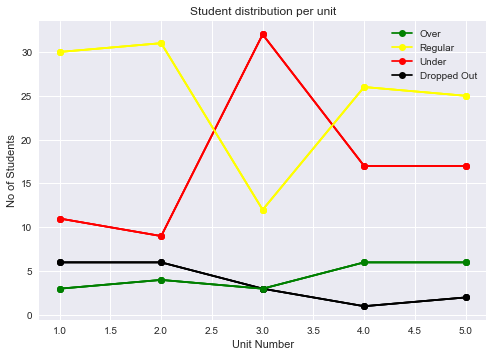

In [168]:
x = np.arange(5)+1
line1 = mlines.Line2D(x,uc[1], label="Dropped Out", marker='o', linestyle='-', color='black')
line2 = mlines.Line2D(x,uc[1], label="Under", marker='o',linestyle='-', color='red')
line3 = mlines.Line2D(x,uc[2], label="Regular", marker='o',linestyle='-', color='yellow')
line4 = mlines.Line2D(x,uc[3], label="Over", marker='o',linestyle='-', color='green')
plt.legend(handles=[line4,line3,line2,line1])
plt.plot(x,uc[0],marker='o', linestyle='-', color='black')
plt.plot(x,uc[1],marker='o', linestyle='-', color='red')
plt.plot(x,uc[2],marker='o', linestyle='-', color='yellow')
plt.plot(x,uc[3],marker='o', linestyle='-', color='green')
plt.xlabel('Unit Number')
plt.ylabel('No of Students')
plt.title('Student distribution per unit')
#plt.plot(x,uc[0],'b',x,uc[1],'r',x,uc[2],'y',x,uc[3],'g')
plt.savefig('/Users/kns/Dropbox/SuperSeniorFall/DDE/posterplot.png', format='png', dpi=1000)
plt.show()

In [50]:
a[m] =233

In [51]:
a

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30, 233, 233, 233, 233, 233, 233, 233, 233,
       233,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49])

In [52]:
 grades = np.chararray(50)

In [53]:
grades[:] = 'F'

chararray([b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F',
           b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F',
           b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F',
           b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F',
           b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F'],
          dtype='|S1')